In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
#to find adjusted r2 value
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [90]:
data = pd.read_csv("C:/Users/pranay/Downloads/ToyotaCorolla.csv")
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [91]:
data.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [92]:
data.tail(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
data.describe(include='all')

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,NaN,NaN,NaN,NaN,NaN,Petrol,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,107,NaN,NaN,NaN,NaN,NaN,1264,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,721.555014,NaN,10730.824513,55.947075,5.548747,1999.625348,68533.259749,NaN,101.502089,0.674791,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,NaN,3626.964585,18.599988,3.354085,1.540722,37506.448872,NaN,14.981080,0.468616,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,NaN,4350.000000,1.000000,1.000000,1998.000000,1.000000,NaN,69.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,NaN,8450.000000,44.000000,3.000000,1998.000000,43000.000000,NaN,90.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,NaN,9900.000000,61.000000,5.000000,1999.000000,63389.500000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,NaN,11950.000000,70.000000,8.000000,2001.000000,87020.750000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000


In [94]:
data = data.drop(columns=['Id','Model','Mfg_Month','Mfg_Month','Fuel_Type','Met_Color','Color','Automatic','Cylinders'])
data.drop(data.iloc[:, 17:36], inplace=True, axis=1)

In [95]:
data.describe(include='all')

,Price,Age_08_04,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,1999.625348,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357
std,3626.964585,18.599988,1.540722,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104
min,4350.000000,1.000000,1998.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,1998.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000
50%,9900.000000,61.000000,1999.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000
75%,11950.000000,70.000000,2001.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000
max,32500.000000,80.000000,2004.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

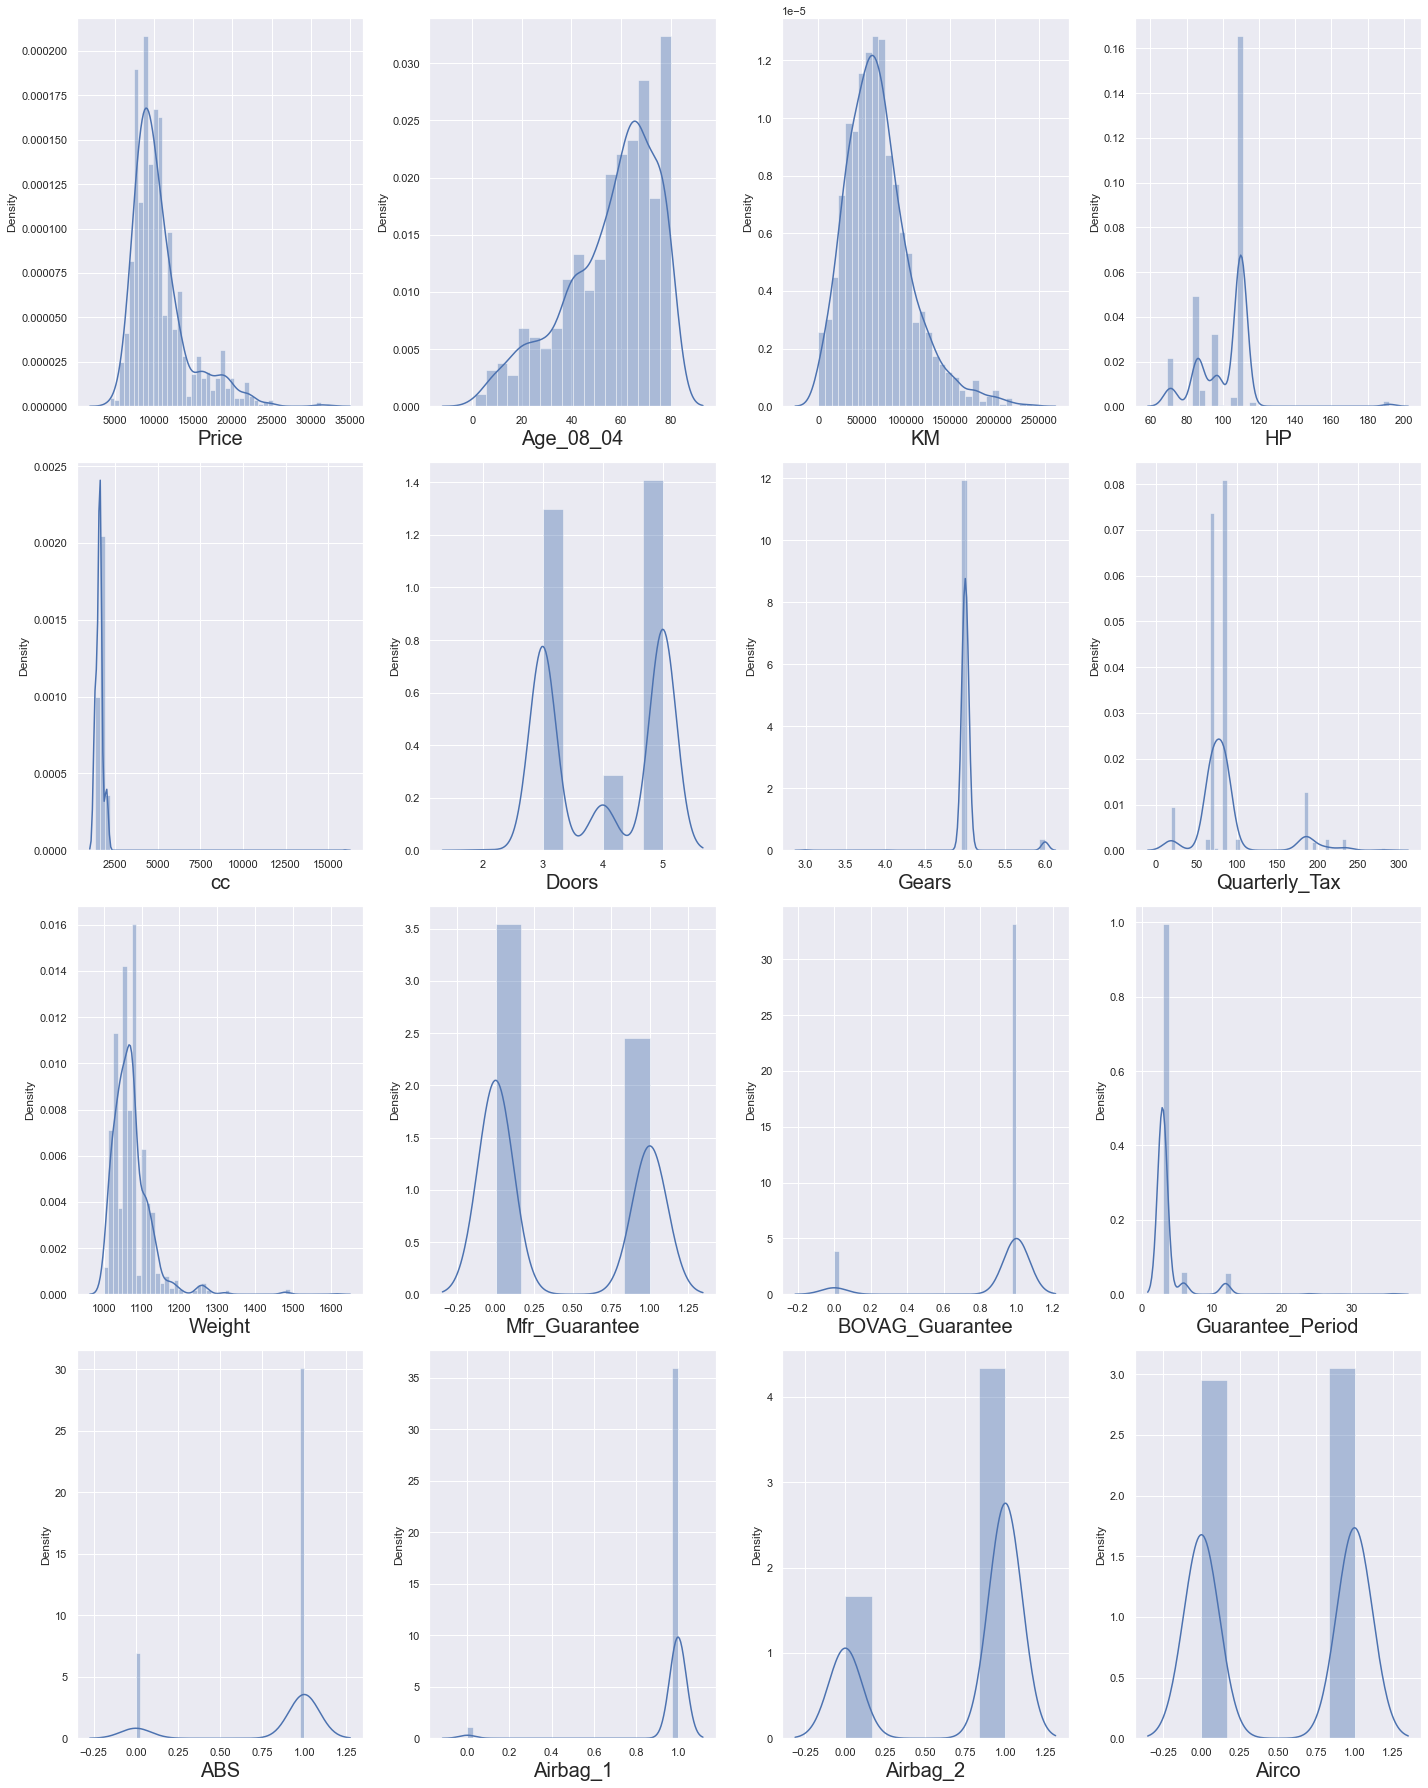

In [97]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber =1
for column in data :
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber += 1
    plt.tight_layout()

In [98]:
y = data['Price']
X = data.drop(columns=['Price'])

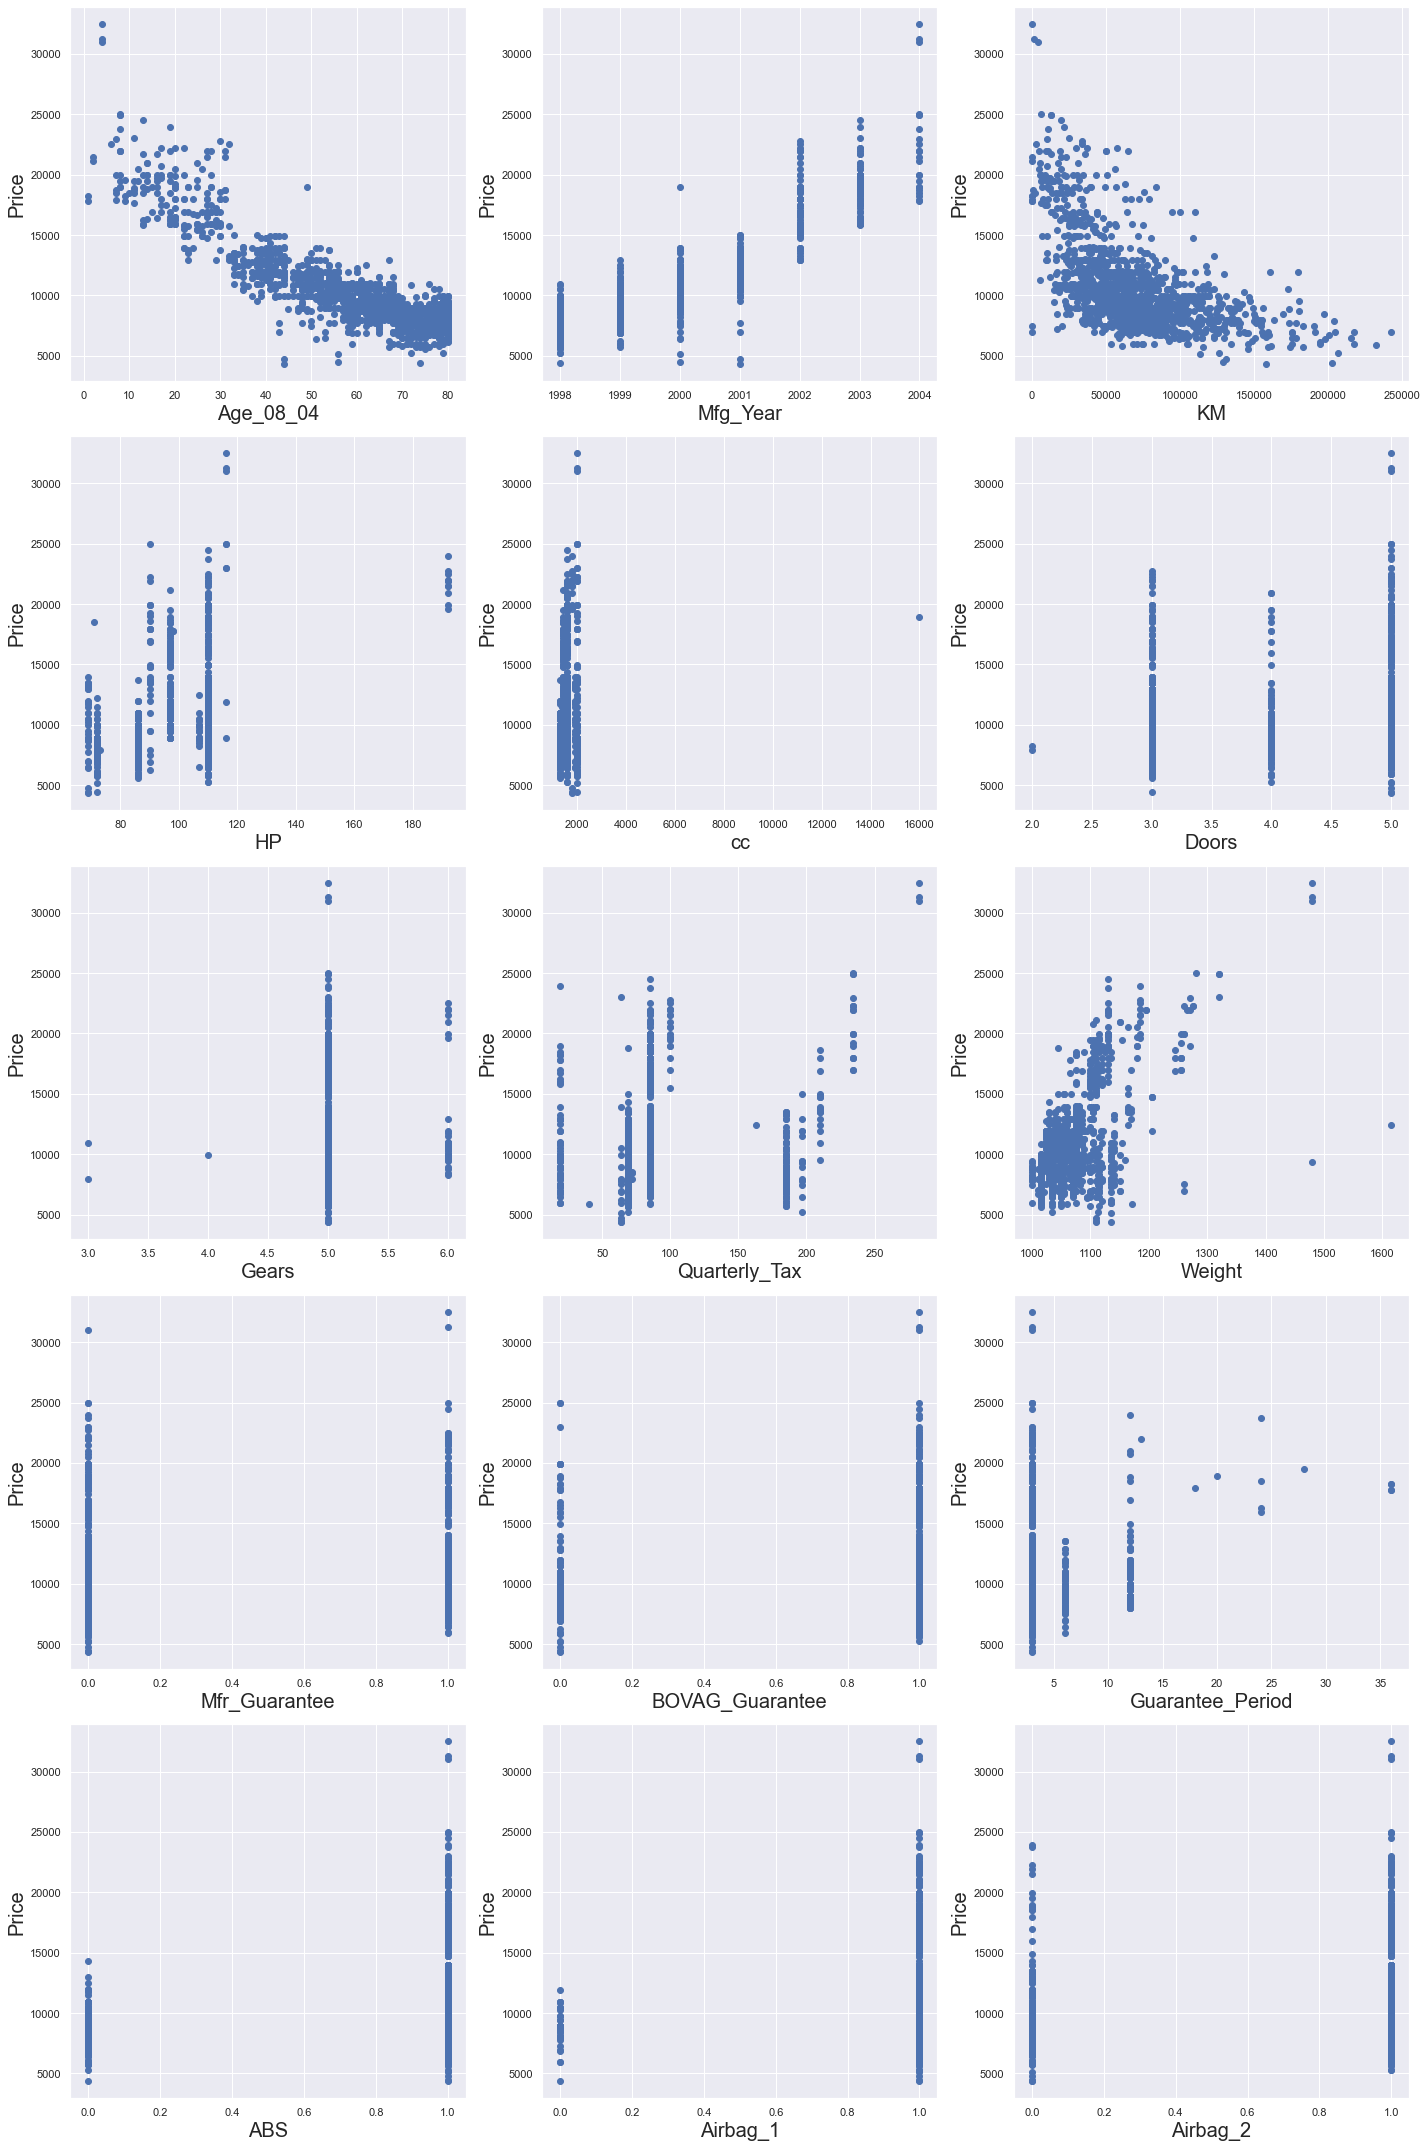

In [97]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
#calculating vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [101]:
vif

,VIF,Features
0,32.197211,Age_08_04
1,31.371538,Mfg_Year
2,1.813680,KM
3,1.493843,HP
4,1.180473,cc
5,1.179994,Doors
6,1.133166,Gears
7,2.575699,Quarterly_Tax
8,2.770131,Weight
9,1.148814,Mfr_Guarantee


In [102]:
#Since VIF score > 5 for Age_08_04 and Mfg_Year, so we've to drop one of the columns
data  = data.drop(columns = ['Age_08_04'])

In [103]:
#Since VIF score > 5 for Age_08_04 and Mfg_Year, so we've to drop one of the columns
data  = data.drop(columns = ['Mfg_Year'])

In [68]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [69]:
y_train

1052     6950
355     13750
170     18245
1328     6900
1040     9500
        ...  
1095     6900
1130     7950
1294     6950
860      9750
1126     6800
Name: Price, Length: 1077, dtype: int64

In [70]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [71]:
#to save model to local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [72]:
X

,Age_08_04,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco
0,23,2002,46986,90,2000,3,5,210,1165,0,1,3,1,1,1,0
1,23,2002,72937,90,2000,3,5,210,1165,0,1,3,1,1,1,1
2,24,2002,41711,90,2000,3,5,210,1165,1,1,3,1,1,1,0
3,26,2002,48000,90,2000,3,5,210,1165,1,1,3,1,1,1,0
4,30,2002,38500,90,2000,3,5,210,1170,1,1,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,1998,20544,86,1300,3,5,69,1025,1,1,3,1,1,1,1
1432,72,1998,19000,86,1300,3,5,69,1015,0,1,3,1,1,1,0
1433,71,1998,17016,86,1300,3,5,69,1015,0,1,3,0,1,1,0
1434,70,1998,16916,86,1300,3,5,69,1015,1,1,3,0,0,0,0


In [73]:
#prediction
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler.transform([[28,2003,50000,95,2500,4,5,175,1200,1,1,3,0,1,1,1]]))
a

array([18958.68123114])

In [74]:
regression.score(x_train,y_train)

0.8819440840154724

In [75]:
adj_r2(x_test,y_test)

0.8635982239639712

In [76]:
#checking overfitting of training data

In [77]:
#Lasso regularization
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [78]:
alpha = lasscv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.7602930916735544)

In [79]:
lasso_reg.score(x_test,y_test)

0.8698461829564219

In [80]:
#ridge regularization
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridgecv = RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([9.42708815, 7.23630993, 1.04199294, 0.48291498, 1.96875367,
       9.09664511, 5.98676329, 8.03356261, 9.75265359, 3.09828862,
       3.91874612, 5.6124665 , 1.09804196, 4.20093856, 4.43683179,
       1.61197502, 2.25866469, 1.22013526, 6.70472487, 3.89450269,
       3.89359201, 1.07391365, 8.98513474, 4.25480035, 6.73142012,
       8.18763327, 8.85146988, 7.81808496, 7.96040104, 8.64175419,
       8.04527606, 6.52232469, 3.10170076, 8.89159446, 8.70159768,
       5.481974  , 6.27959868, 0.93644965, 1.01027407, 6.4562994 ,
       7.36346645, 6.53461046, 3.45348878, 8.61423246, 8.21237131,
       3.29325215, 1.28235306, 4.24964021, 0.5186768 , 5.77813371]),
        cv=10, normalize=True)

In [81]:
ridgecv.alpha_

0.4829149782205999

In [82]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.4829149782205999)

In [83]:
ridge_model.score(x_test,y_test)

0.869718712779807

In [84]:
#Elastic net

In [85]:
elasticCV = ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [86]:
elasticCV.alpha_

6.384978455784904

In [87]:
elasticCV.l1_ratio

0.5

In [88]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=6.384978455784904)

In [89]:
elasticnet_reg.score(x_test,y_test)

0.625043183322836

In [94]:
import statsmodels.api as sm
qqplot=sm.qqplot(loaded_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'resid'